In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
features = pd.read_csv("~/depot/tdm-musafe/data/features.csv") # Import features set

In [3]:
df_raw = pd.read_csv('~/depot/tdm-musafe/data/human-activity-recognition/raw-data/har_raw.gz') # import raw data to get incident classification

In [4]:
df = df_raw.drop_duplicates(subset="incident_id").reset_index().drop("index", axis=1)

In [5]:
df.head()

,hash_id,incident_id,motion,sample_number,milliseconds,seconds,x,y,z,occurrence_ts,confirmation_ts
0,3888c2da3334b3963aabe2ee5b5c832e,7543315,other,1,40,1,-0.21,0.68,0.41,2021-09-27T11:07:52Z,2021-10-04T18:24:51Z
1,3888c2da3334b3963aabe2ee5b5c832e,7901327,other,1,40,1,-0.34,0.88,0.41,2021-10-13T16:40:36Z,2021-10-14T12:31:04Z
2,8536612cc79d16410dcda09314f79410,7864944,other,1,40,1,-0.02,0.50,-0.03,2021-10-12T16:39:28Z,2021-10-12T21:11:58Z
3,8536612cc79d16410dcda09314f79410,7777831,other,1,40,1,0.17,0.87,0.20,2021-10-07T22:36:00Z,2021-10-12T16:04:13Z
4,5fe5cdf264c6f7491b235dcdd3c2a1ff,8232092,other,1,40,1,-0.26,0.88,0.21,2021-10-26T20:03:59Z,2021-10-29T20:49:07Z


In [6]:
new_df = pd.merge(features, df[["incident_id", "motion"]], on="incident_id", how="left")

In [7]:
new_df.head()

,incident_id,maximum,minimum,range,mean,standard deviation,variance,skew,kurtosis,total variation,...,window 2520:7520 total variation,window 2520:7520 mean x,window 2520:7520 mean y,window 2520:7520 mean z,window 2520:7520 angular path length,window 2520:7520 biggest angle difference,window 2520:7520 low frequency power,window 2520:7520 medium frequency power,window 2520:7520 high frequency power,motion
0,729353,3.299182,0.200998,3.098184,1.118297,0.433189,0.187653,1.235819,3.329116,63.578636,...,13.342819,0.31752,-0.14160,0.41072,1.019757,0.986986,0.023158,0.062948,0.029965,other
1,729389,3.102193,0.232809,2.869384,1.155901,0.357949,0.128128,2.076920,8.020846,30.870376,...,7.904559,0.09504,-0.62024,0.86512,0.044255,0.033855,0.005944,0.032819,0.003476,other
2,729405,5.283370,0.037417,5.245954,1.030549,0.460845,0.212378,5.138048,41.192540,40.827839,...,3.626618,-0.15320,0.97848,0.13256,0.307259,0.293787,0.000019,0.000027,0.000096,other
3,730067,3.245381,0.305287,2.940095,1.006611,0.198571,0.039430,4.008560,43.424537,34.557172,...,7.940684,-0.08320,0.87624,0.26920,0.411793,0.411309,0.002806,0.021046,0.008334,other
4,730071,3.598389,0.179722,3.418667,1.004410,0.270733,0.073296,4.564226,36.720746,33.030022,...,7.079925,0.11440,0.77584,0.50472,0.095371,0.058382,0.000205,0.002146,0.005786,other


In [8]:
# Putting feature variable to X
X = new_df.drop(['motion','incident_id'],axis=1)
# Putting response variable to y
y = new_df['motion']

In [9]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [10]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.20, random_state=42)

In [11]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (554, 108)
X_test shape: (2216, 108)
y_train shape: (554,)
y_test shape: (2216,)


In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [14]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 384 ms, sys: 6.26 ms, total: 390 ms
Wall time: 618 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [15]:
# checking the oob score
classifier_rf.oob_score_

0.9133574007220217

In [16]:
# Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [17]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [20]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


/scratch/brown/kamstut/tdm/apps/jupyter/kernels/f2021-s2022/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


CPU times: user 1min 39s, sys: 285 ms, total: 1min 40s
Wall time: 1min 40s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [22]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [23]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [25]:
from sklearn.ensemble import RandomForestClassifier

feature_names = X.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [55]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.033 seconds


In [56]:
forest_importances = pd.Series(importances, index=feature_names)[1:]

In [57]:
forest_importances = forest_importances.sort_values(ascending=False)
for i in range(len(forest_importances)):
    print(forest_importances[i], feature_names[i])

0.022962728941013224 maximum
0.02225358012206632 minimum
0.017887169240967907 range
0.017758019575993378 mean
0.01736248226750888 standard deviation
0.01726307485331809 variance
0.01718562646767553 skew
0.01679282762725085 kurtosis
0.01673115566986559 total variation
0.015775723571542465 mean x
0.014439295990037857 mean y
0.014364425847226182 mean z
0.014092971520712462 peak x
0.013974907842671054 peak y
0.013686745271647854 peak z
0.013636688946380525 stillness
0.013606890396696582 middle of stillness
0.013548081418755516 angular path length
0.012859191906291966 biggest angle difference
0.012144312448754767 angle between incident and vertical
0.012118416373308218 low frequency power
0.012060870323313034 medium frequency power
0.011976338631759304 high frequency power
0.011602357915763436 window -7480:-2480 maximum
0.011051096368407691 window -7480:-2480 minimum
0.010862853940164636 window -7480:-2480 range
0.010839436474581944 window -7480:-2480 mean
0.010740651096652969 window -7480:

In [58]:
top_10 = forest_importances.head(10)

In [59]:
std = std[::-1][0:10]

In [60]:
len(std)

10

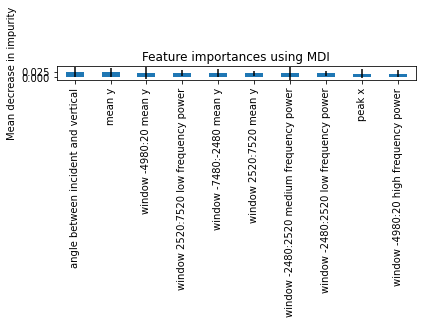

In [61]:
fig, ax = plt.subplots()
top_10.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout() 

In [71]:
forest_importances

angle between incident and vertical       0.022963
mean y                                    0.022254
window -4980:20 mean y                    0.017887
window 2520:7520 low frequency power      0.017758
window -7480:-2480 mean y                 0.017362
                                            ...   
angular path length                       0.004415
window -2480:2520 high frequency power    0.004366
kurtosis                                  0.004221
window -4980:20 mean x                    0.004187
window 20:5020 mean x                     0.002748
Length: 107, dtype: float64